In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("Datasets/customerchurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#initial exploration of dataset
df.shape

(7043, 21)

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#creating dataframe that will be used for the model
modeldf=df.copy()
modeldf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
#converting string columns into numeric
#converting gender column
modeldf['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [12]:
def convertgender(gender):
    if gender=="Male":
        return 0
    elif gender=="Female":
        return 1
    else:
        return None
    
modeldf['gender']=modeldf['gender'].apply(convertgender)

In [13]:
modeldf['gender'].value_counts()

gender
0    3555
1    3488
Name: count, dtype: int64

In [14]:
#converting partner column
modeldf['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [15]:
def convertpartner(partner):
    if partner=="No":
        return 0
    elif partner=="Yes":
        return 1
    else:
        return None
modeldf['Partner']=modeldf['Partner'].apply(convertpartner)

In [16]:
modeldf['Partner'].value_counts()

Partner
0    3641
1    3402
Name: count, dtype: int64

In [17]:
#converting dependent column
modeldf['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [18]:
def convertdependent(dependent):
    if dependent=="No":
        return 0
    elif dependent=="Yes":
        return 1
    else:
        return None
    
modeldf['Dependents']=modeldf['Dependents'].apply(convertdependent)

In [19]:
modeldf['Dependents'].value_counts()

Dependents
0    4933
1    2110
Name: count, dtype: int64

In [20]:
#converting phoneservice column
modeldf['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [21]:
def convertphoneservice(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
    else:
        return None
modeldf['PhoneService']=modeldf['PhoneService'].apply(convertphoneservice)

In [22]:
modeldf['PhoneService'].value_counts()

PhoneService
1    6361
0     682
Name: count, dtype: int64

In [23]:
#convert multiplelines column
modeldf['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [24]:
def convertmultiple(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
    elif val=="No phone service":
        return 2
    else:
        return None
modeldf['MultipleLines']=modeldf['MultipleLines'].apply(convertmultiple)

In [25]:
modeldf['MultipleLines'].value_counts()

MultipleLines
0    3390
1    2971
2     682
Name: count, dtype: int64

In [26]:
#convert internetservice column
modeldf['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [27]:
def convertinternet(val):
    if val=="No":
        return 0
    elif val=="DSL":
        return 1
    elif val=="Fiber optic":
        return 2
    else:
        return None
modeldf['InternetService']=modeldf['InternetService'].apply(convertinternet)

In [28]:
modeldf['InternetService'].value_counts()

InternetService
2    3096
1    2421
0    1526
Name: count, dtype: int64

In [29]:
#convert onlinesecurity column
modeldf['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [30]:
def convertsecurity(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
    elif val=="No internet service":
        return 2 
    else:
        return None
modeldf['OnlineSecurity']=modeldf['OnlineSecurity'].apply(convertsecurity)

In [31]:
modeldf['OnlineSecurity'].value_counts()

OnlineSecurity
0    3498
1    2019
2    1526
Name: count, dtype: int64

In [32]:
#convert onlinebackup column
modeldf['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [33]:
def convertbackup(val):
    if val=='No':
        return 0
    elif val=="Yes":
        return 1
    elif val=="No internet service":
        return 2
    else:
        return None
modeldf['OnlineBackup']=modeldf['OnlineBackup'].apply(convertbackup)

In [34]:
modeldf['OnlineBackup'].value_counts()

OnlineBackup
0    3088
1    2429
2    1526
Name: count, dtype: int64

In [35]:
#convert deviceprotection
modeldf['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [36]:
def convertprotection(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
    elif val=="No internet service":
        return 2
    else:
        return None
modeldf['DeviceProtection']=modeldf['DeviceProtection'].apply(convertprotection)

In [37]:
modeldf['DeviceProtection'].value_counts()

DeviceProtection
0    3095
1    2422
2    1526
Name: count, dtype: int64

In [38]:
#convert techsupport column
modeldf['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [39]:
def convertsupport(val):
    if val=='No':
        return 0
    elif val=="Yes":
        return 1
    elif val=="No internet service":
        return 2
    else:
        return None
modeldf['TechSupport']=modeldf['TechSupport'].apply(convertsupport)

In [40]:
modeldf['TechSupport'].value_counts()

TechSupport
0    3473
1    2044
2    1526
Name: count, dtype: int64

In [41]:
#convert streamingTV column
modeldf['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [42]:
def converttv(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
    elif val=='No internet service':
        return 2
    else:
        return None
modeldf['StreamingTV']=modeldf['StreamingTV'].apply(converttv)

In [43]:
modeldf['StreamingTV'].value_counts()

StreamingTV
0    2810
1    2707
2    1526
Name: count, dtype: int64

In [44]:
#convert streamingmovies column
modeldf['StreamingMovies'].value_counts()


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [45]:
def convertmovies(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
    elif val=="No internet service":
        return 2
    else:
        return None
modeldf['StreamingMovies']=modeldf['StreamingMovies'].apply(convertmovies)
    

In [46]:
modeldf['StreamingMovies'].value_counts()

StreamingMovies
0    2785
1    2732
2    1526
Name: count, dtype: int64

In [47]:
#convert Contract column
modeldf['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [48]:
def convertcontract(val):
    if val=="Month-to-month":
        return 0
    elif val=="One year":
        return 1
    elif val=="Two year":
        return 2
    else:
        return None
modeldf['Contract']=modeldf['Contract'].apply(convertcontract)

In [49]:
modeldf['Contract'].value_counts()

Contract
0    3875
2    1695
1    1473
Name: count, dtype: int64

In [50]:
#convert PaperlessBilling column
modeldf['PaperlessBilling'].value_counts()


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [51]:
def convertbilling(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
    else:
        return None
modeldf['PaperlessBilling']=modeldf['PaperlessBilling'].apply(convertbilling)

In [52]:
modeldf['PaperlessBilling'].value_counts()

PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64

In [53]:
#convert paymentmethod
modeldf['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [54]:
def convertpayment(val):
    if val=="Electronic check":
        return 0
    elif val=="Mailed check":
        return 1
    elif val=="Bank transfer (automatic)":
        return 2
    elif val=="Credit card (automatic)":
        return 3
    else:
        return None
modeldf['PaymentMethod']=modeldf['PaymentMethod'].apply(convertpayment)

In [55]:
modeldf['PaymentMethod'].value_counts()

PaymentMethod
0    2365
1    1612
2    1544
3    1522
Name: count, dtype: int64

In [56]:
#convert totalcharges column
modeldf['TotalCharges'].value_counts()

TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64

In [57]:
modeldf['TotalCharges']=modeldf['TotalCharges'].replace(" ",0)
modeldf['TotalCharges']=pd.to_numeric(modeldf['TotalCharges'])

In [58]:
modeldf['TotalCharges'].value_counts()

TotalCharges
20.20      11
0.00       11
19.75       9
19.65       8
19.90       8
           ..
1990.50     1
7362.90     1
346.45      1
306.60      1
108.15      1
Name: count, Length: 6531, dtype: int64

In [59]:
#convert churn column
modeldf['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [60]:
def convertchurn(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
    else:
        return None
modeldf['Churn']=modeldf['Churn'].apply(convertchurn)

In [61]:
modeldf['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

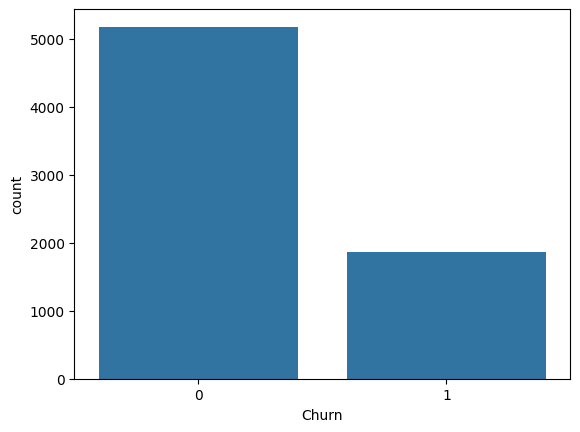

In [65]:
#advanced exploration
sns.countplot(data=modeldf,x="Churn")

<Axes: xlabel='gender', ylabel='count'>

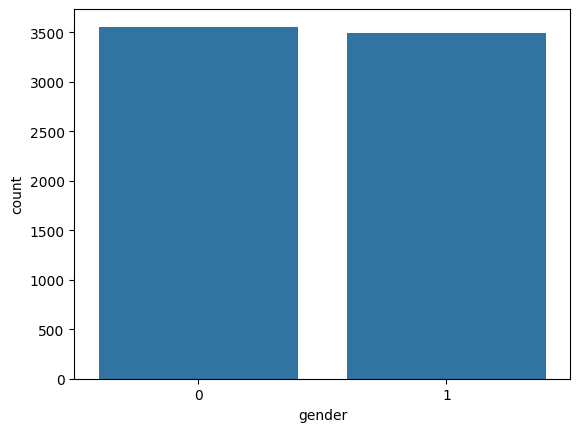

In [66]:
sns.countplot(data=modeldf,x="gender")

<Axes: xlabel='SeniorCitizen', ylabel='count'>

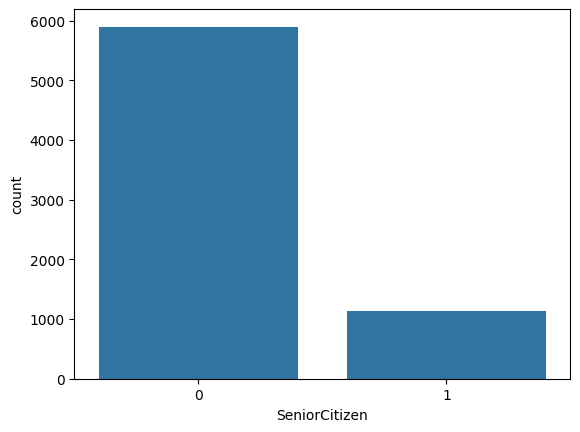

In [69]:
sns.countplot(data=modeldf,x="SeniorCitizen")

<Axes: xlabel='Partner', ylabel='count'>

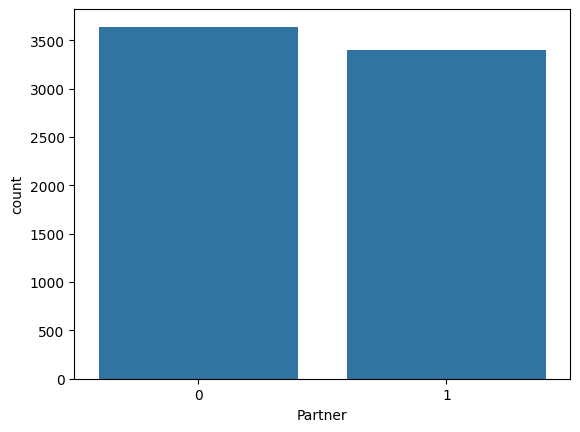

In [70]:
sns.countplot(data=modeldf,x="Partner")

<Axes: xlabel='Dependents', ylabel='count'>

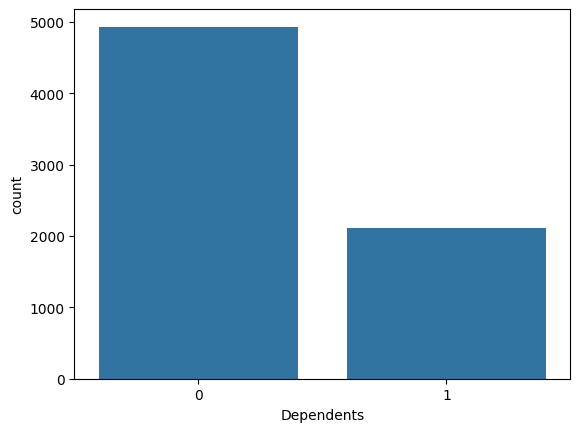

In [71]:
sns.countplot(data=modeldf,x="Dependents")

<Axes: xlabel='tenure'>

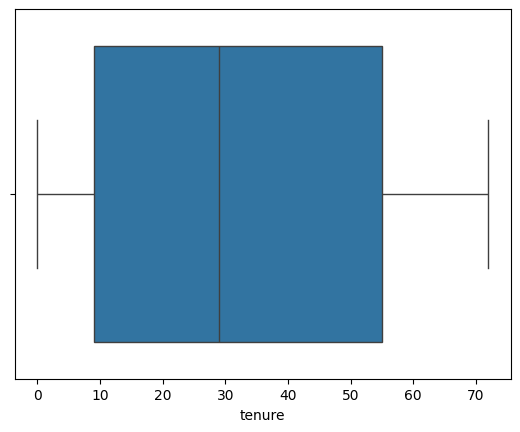

In [72]:
sns.boxplot(data=modeldf,x="tenure")

<Axes: xlabel='PhoneService', ylabel='count'>

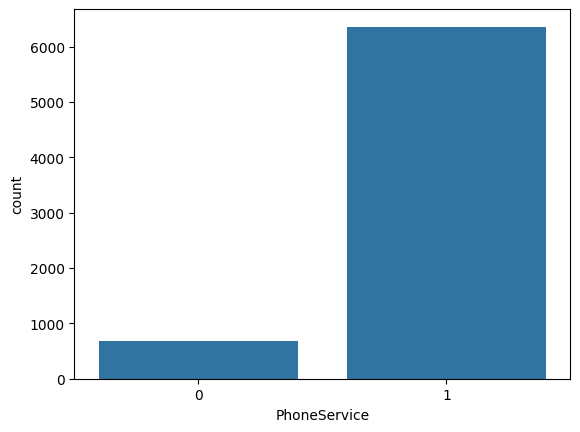

In [73]:
sns.countplot(data=modeldf,x="PhoneService")

<Axes: xlabel='MultipleLines', ylabel='count'>

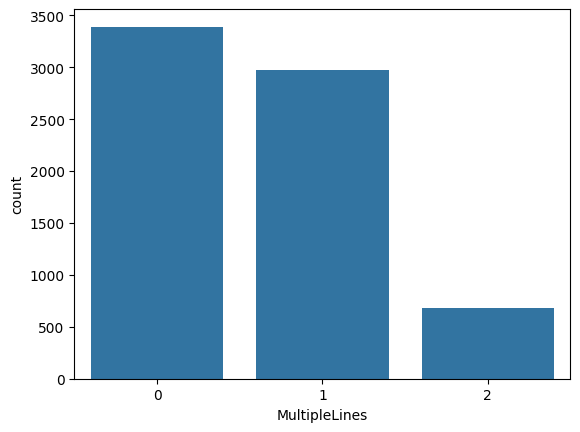

In [74]:
sns.countplot(data=modeldf,x="MultipleLines")

<Axes: xlabel='InternetService', ylabel='count'>

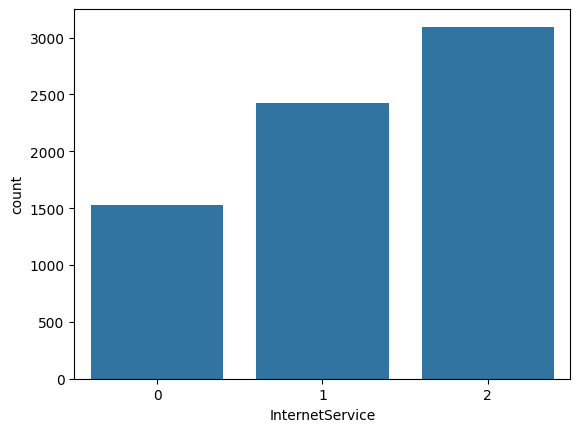

In [75]:
sns.countplot(data=modeldf,x="InternetService")

<Axes: xlabel='OnlineSecurity', ylabel='count'>

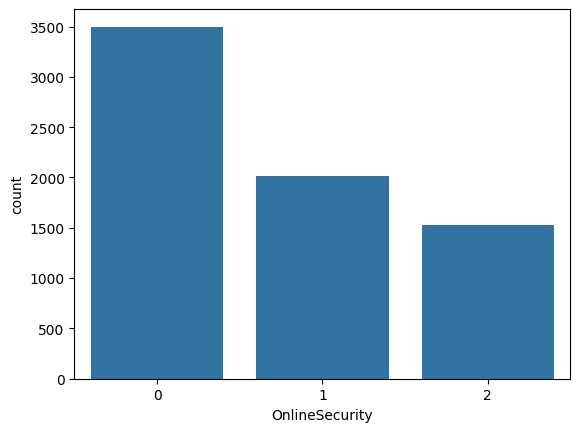

In [76]:
sns.countplot(data=modeldf,x="OnlineSecurity")

<Axes: xlabel='OnlineBackup', ylabel='count'>

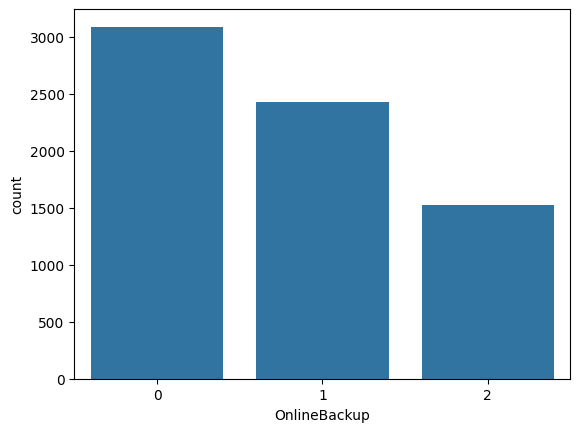

In [77]:
sns.countplot(data=modeldf,x="OnlineBackup")

<Axes: xlabel='DeviceProtection', ylabel='count'>

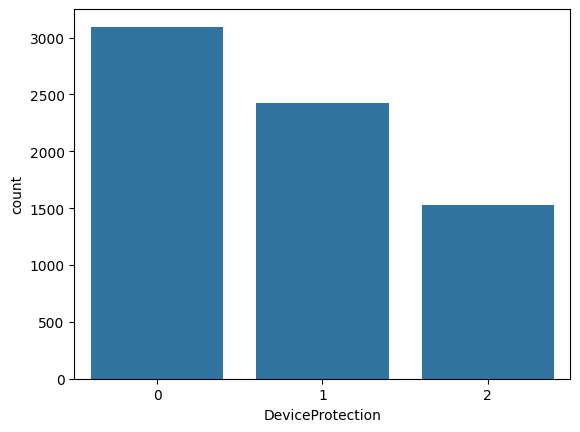

In [78]:
sns.countplot(data=modeldf,x="DeviceProtection")

<Axes: xlabel='TechSupport', ylabel='count'>

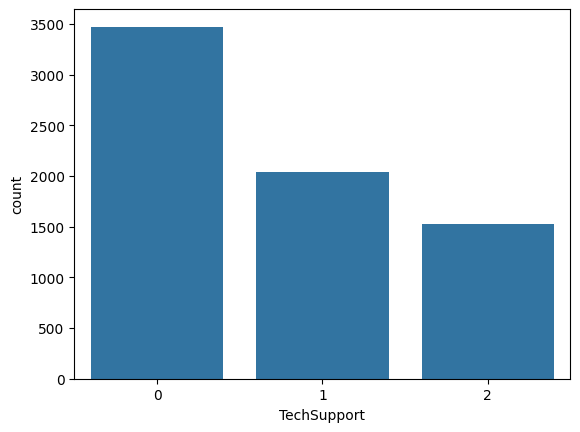

In [79]:
sns.countplot(data=modeldf,x="TechSupport")

<Axes: xlabel='StreamingTV', ylabel='count'>

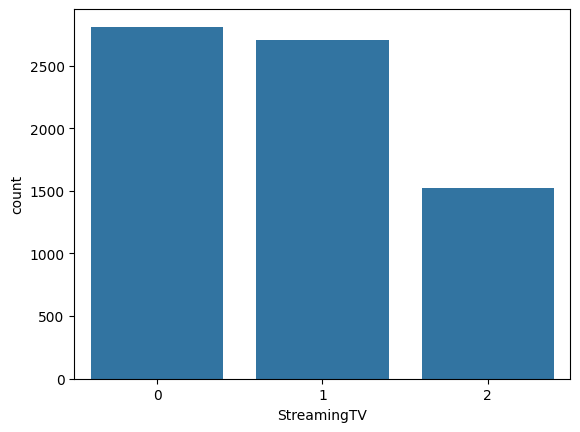

In [80]:
sns.countplot(data=modeldf,x="StreamingTV")

<Axes: xlabel='StreamingMovies', ylabel='count'>

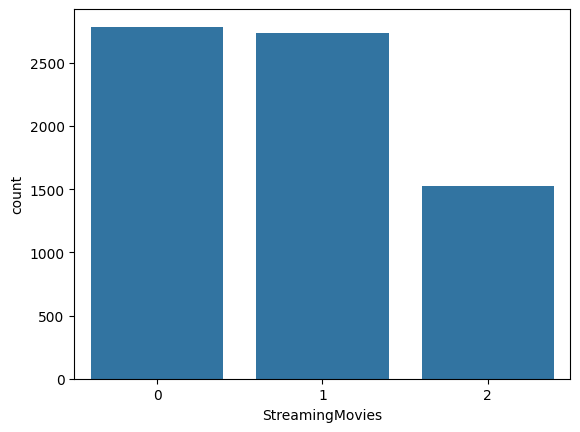

In [81]:
sns.countplot(data=modeldf,x="StreamingMovies")

<Axes: xlabel='Contract', ylabel='count'>

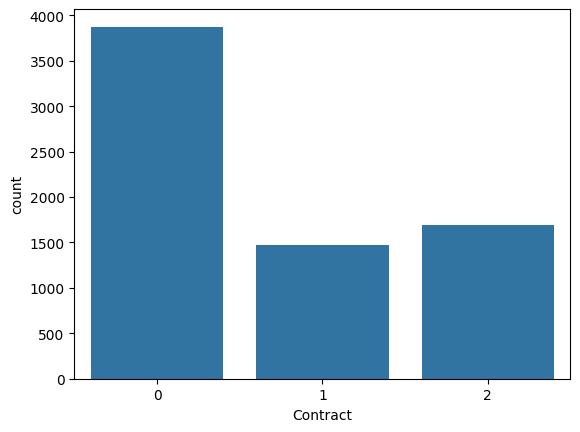

In [83]:
sns.countplot(data=modeldf,x="Contract")

<Axes: xlabel='PaperlessBilling', ylabel='count'>

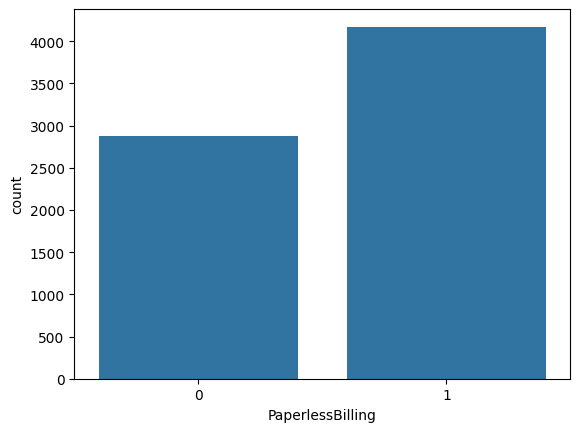

In [84]:
sns.countplot(data=modeldf,x="PaperlessBilling")

<Axes: xlabel='PaymentMethod', ylabel='count'>

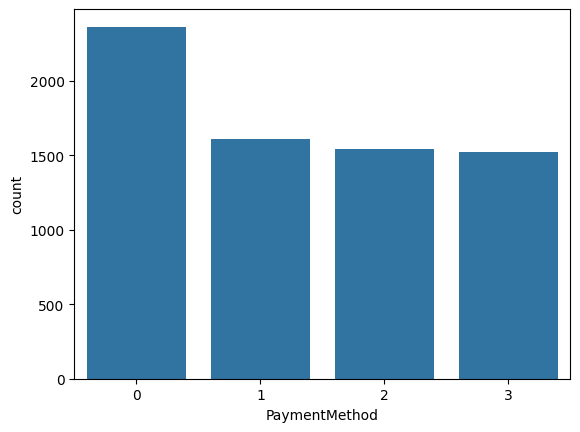

In [85]:
sns.countplot(data=modeldf,x="PaymentMethod")

<Axes: xlabel='MonthlyCharges'>

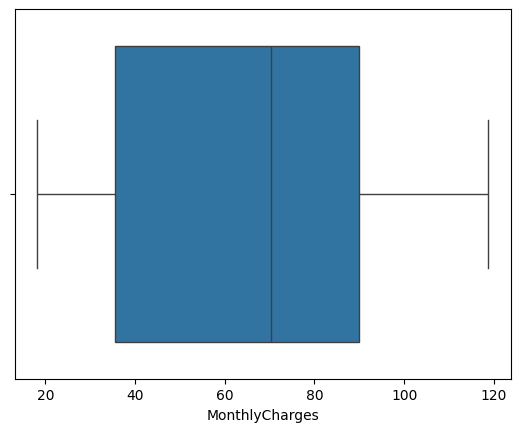

In [86]:
sns.boxplot(data=modeldf,x="MonthlyCharges")

<Axes: xlabel='TotalCharges'>

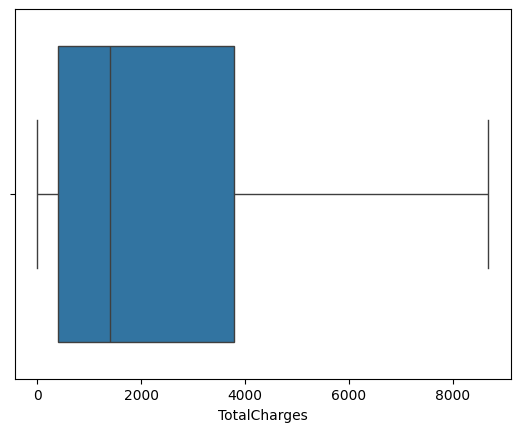

In [87]:
sns.boxplot(data=modeldf,x="TotalCharges")

<Axes: >

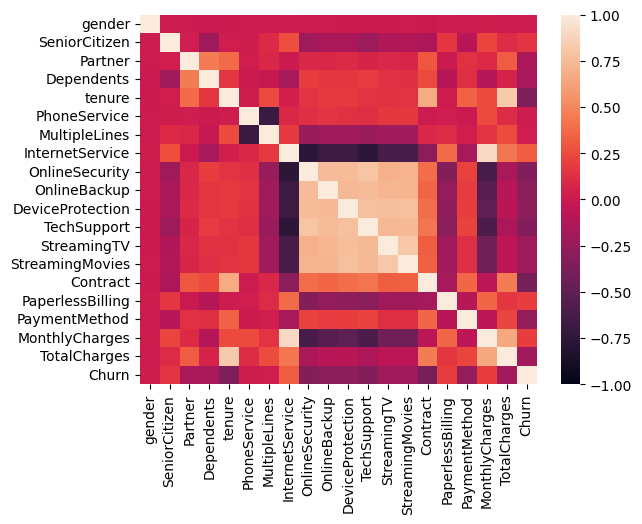

In [99]:
corrdf=modeldf[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
corr=corrdf.corr()
sns.heatmap(corr,vmax=1,vmin=-1)

In [102]:
#save clean data
cleandata=modeldf[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]
cleandata.to_csv("Datasets/cleandata.csv")

In [ ]:
#further cleaning
